For Titanic dataset, what factors made passengers more or less likely to survive?
How about age, gender and class are related to the survived rate,respectively?
How does multiple-variable affect the possibility of survival?

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
tn = pd.read_csv('titanic-data.csv')

In [177]:
tn.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
tn.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [179]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [180]:
tn.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [181]:
tn[['Sex', 'Pclass', 'Age']]

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0
5,male,3,NaN
6,male,1,54.0
7,male,3,2.0
8,female,3,27.0
9,female,2,14.0


In [182]:
tn[tn['Age'].isnull()][['Sex', 'Pclass', 'Age', 'Survived']]

,Sex,Pclass,Age,Survived
5,male,3,NaN,0
17,male,2,NaN,1
19,female,3,NaN,1
26,male,3,NaN,0
28,female,3,NaN,1
29,male,3,NaN,0
31,female,1,NaN,1
32,female,3,NaN,1
36,male,3,NaN,1
42,male,3,NaN,0


In [183]:
tn['Gender']=tn['Sex'].map({'female':0,'male':1}).astype(int)
tn['Survival']=tn['Survived'].map({0:'Died',1:'Survived'})
tn['Class'] = tn['Pclass'].map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})

In [184]:
tn.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Survival,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Died,Third Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Survived,First Class
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Survived,Third Class


Now it's time to deal with the missing values of Age.We could fill in the null values with the median age which is decided by different class and gender.

In [185]:
median_ages=np.zeros((2,3))

In [186]:
for i in range(0,2):
    for j in range(0,3):
        median_ages[i,j]=tn[(tn['Gender'] == i) & \
                        (tn['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [187]:
tn['Agefill'] = tn['Age']
tn.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Survival,Class,Agefill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Died,Third Class,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Survived,First Class,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Survived,Third Class,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Survived,First Class,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Died,Third Class,35.0


In [188]:
for i in range(0,2):
    for j in range(0,3):
        tn.loc[(tn.Age.isnull())&(tn.Gender==i)&\
               (tn.Pclass==j+1),'Agefill']=median_ages[i,j]

In [189]:
 tn[ tn['Age'].isnull() ][['Gender','Pclass','Age','Agefill']].head(12)
### We could see if the new colume 'Agefill' is filled by median ages. ###

,Gender,Pclass,Age,Agefill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [190]:
tn.groupby('Survived')['Agefill'].describe()

Survived       
0         count    549.000000
          mean      29.737705
          std       12.818264
          min        1.000000
          25%       22.000000
          50%       25.000000
          75%       37.000000
          max       74.000000
1         count    342.000000
          mean      28.108684
          std       14.010565
          min        0.420000
          25%       21.000000
          50%       27.000000
          75%       36.000000
          max       80.000000
Name: Agefill, dtype: float64

We got the statistics of two groups above, the mean age of survived people is a bit of younger than dead people. Then we will explore more in the age histogram of two groups.

In [198]:
tn0 = tn[tn['Survival']=='Died']['Agefill']

In [199]:
tn1 = tn[tn['Survival']=='Survived']['Agefill']

(array([  18.,   16.,  116.,  202.,   64.,   61.,   38.,   15.,   13.,    6.]),
 array([  1. ,   8.3,  15.6,  22.9,  30.2,  37.5,  44.8,  52.1,  59.4,
         66.7,  74. ]),
 <a list of 10 Patch objects>)

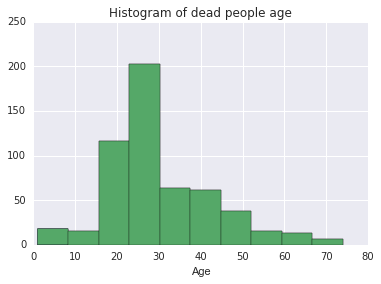

In [200]:
%matplotlib inline
tn0.hist()
plt.title('Histogram of dead people age')
plt.xlabel('Age')
plt.hist(tn0, bins=10)

(array([ 36.,  19.,  88.,  78.,  66.,  24.,  21.,   9.,   0.,   1.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

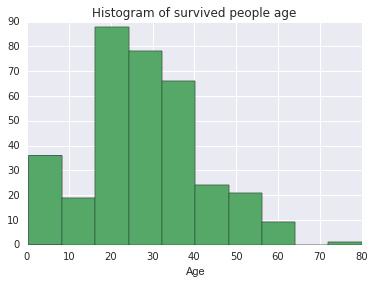

In [201]:
%matplotlib inline
tn1.hist()
plt.title('Histogram of survived people age')
plt.xlabel('Age')
plt.hist(tn1,bins=10)

From the two historgrams, we could also see that the mode of dead people is between '23 ~ 30', the mode of survived people is between '17 ~ 24'. Then, let us check the survived people by "Gender" and "Pclass".

In [195]:
tn.groupby(["Survival","Gender"]).count()

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  \
Survival Gender                                                                
Died     0                81        81      81    81   81   64     81     81   
         1               468       468     468   468  468  360    468    468   
Survived 0               233       233     233   233  233  197    233    233   
         1               109       109     109   109  109   93    109    109   

                 Ticket  Fare  Cabin  Embarked  Class  Agefill  
Survival Gender                                                 
Died     0           81    81      6        81     81       81  
         1          468   468     62       468    468      468  
Survived 0          233   233     91       231    233      233  
         1          109   109     45       109    109      109

From the result above, women died in the disaster were 81, survived were 233; While 468 men died, 109 men survived. Compared to men, women had more possibility to survive

In [143]:
tn.groupby(["Survival","Class"], as_index=False).count()

,Survival,Class,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Agefill
0,Died,First Class,80,80,80,80,80,64,80,80,80,80,59,80,80,80
1,Died,Second Class,97,97,97,97,97,90,97,97,97,97,3,97,97,97
2,Died,Third Class,372,372,372,372,372,270,372,372,372,372,6,372,372,372
3,Survived,First Class,136,136,136,136,136,122,136,136,136,136,117,134,136,136
4,Survived,Second Class,87,87,87,87,87,83,87,87,87,87,13,87,87,87
5,Survived,Third Class,119,119,119,119,119,85,119,119,119,119,6,119,119,119


Compare these three class: in the first class, 80 people died, while 136 people survived; in the third class, 372 people died, only 119 people survived. So it indicates that first class people are more possible to survive. And over half first class people were survived, while only around 25% of third class people survived.

In [145]:
colors = {'Died':"red", 'Survived':"green"}

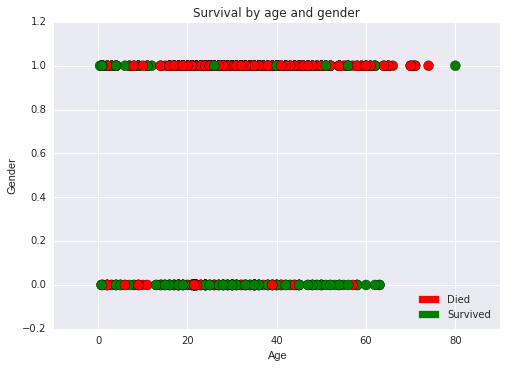

In [159]:
import matplotlib.patches as mpatches
plt.scatter(tn["Agefill"], tn["Gender"], c=tn["Survival"].apply(lambda x: colors[x]), s=100)
plt.title('Survival by age and gender')
plt.xlabel('Age')
plt.ylabel('Gender')
red_patch = mpatches.Patch(color='red', label='Died')
green_patch = mpatches.Patch(color='green', label='Survived')
plt.legend(handles=[red_patch,green_patch],fontsize=10, loc=4)

From the plot, we could see the green color covers most part of the line which represents "Women", while red color covers the line of "Men". Green color represents "Survived", and red represents "Dead". So we could indicate women in all ages are more possible to survive than men. It maybe because that women get on the life boat firstly. Also, we could see most survived men, "green" color, is on the left of x-axis. That means children had high rate of survival. It might be that they let chidren get on the life boat, too. 

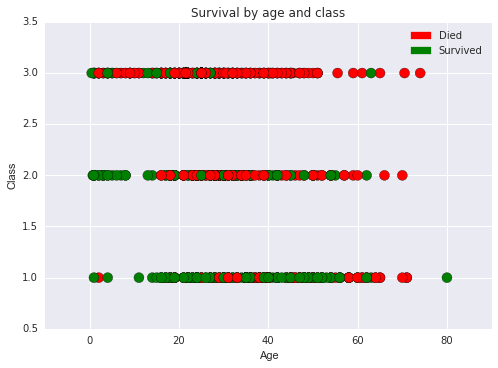

In [157]:
import matplotlib.patches as mpatches
plt.scatter(tn["Agefill"], tn["Pclass"], c=tn["Survival"].apply(lambda x: colors[x]), s=100)
plt.title('Survival by age and class')
plt.xlabel('Age')
plt.ylabel('Class')
red_patch = mpatches.Patch(color='red', label='Died')
green_patch = mpatches.Patch(color='green', label='Survived')
plt.legend(handles=[red_patch,green_patch],fontsize=10)

This scatter shows the survived situation for people of all ages in First, Second and Third class, respectively. And the first class has most green color, the second class is medium, and the third class is coverd mostly by red color. We could say the higher class is more likely to survive. That may be result by that higher class get notice earlier and waering the life jacket earlier. Higher class had priority to get on the life boat as well.

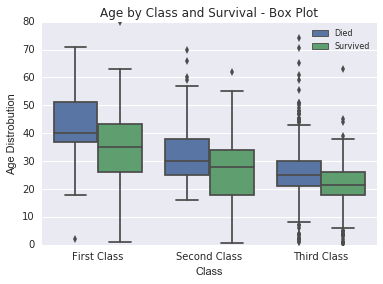

In [216]:
Pac = sns.boxplot(data = tn, x='Pclass', y='Agefill', hue='Survival')
Pac.set(title='Age by Class and Survival - Box Plot', 
 xlabel = 'Class',
 ylabel = 'Age Distrobution',
 xticklabels = ['First Class', 'Second Class', 'Third Class'])
Pac.legend(loc=1, fontsize=8)


This is a box plot above, another type of graph for our analysis. We could see more clearly that first class young people are more possible to survive. And survived people in second class are less and younger. Third class is least people to survive and the survived age is the youngest range.

What people are more likely to survive in Titanic disaster? After these research, we could indicate, first class, children and women are more probable to survive.

Limitations of Analysis: 
   Firstly, NaN elements in Titanic Dataset will affect the analysis. For example, in the "Age" column, there are 714 elements account from the total of 891 passengers. That means 177 passengers are not accounted for "Age', which would affect the histogram of ages distribution. Even we used the median age for those missing age, it was just the assumption. Those true ages of the 177 missing value may change the min, max and mean of the dataset. Also, it could change the shape of other graphs relates to "Age".
   Secondly, Limitations of relying only on statistical calculations without statistical testing. Statistical calculations could merely observes correlation between different catagory data, such as age, gender and class. There isn't a definite null hypothesis in statistical, so we can't approch a clearer statistically significant relationship between aspects of the dataset, involving a confidence percentage of determined rejection or acception of the
null hypothesis.
   Thidly, Other possible factors that can effect analysis. There maybe some other factors influence survivalbility of the passenger, except what we have, such as age, gender and class. Also another thought are the ship itself that could affect survival rates, such as how full each life boat was when they left Titanic?

Reference: Getting Started With Python II Getting Started with Pandas: Kaggle's Titanic Competition https://www.kaggle.com/c/titanic/data 
           Titanic Data - NBViewer: https://nbviewer.jupyter.org/github/CtheDataIO-sdpenaloza/P2-Investigate-a-Dataset-Udacity/blob/master/Project_2_-_Titanic_Data_Rev3.pdf